# Prediction of demand for shared bikes

## Importing and Understanding Data

In [1]:
import numpy as np
import pandas as pd                                  #To work with dataset
import matplotlib.pyplot as plt                      #Data Visualization Libraries
import seaborn as sns                                #Data Visualization Libraries
from sklearn.model_selection import train_test_split #To split dataset into train $ test
from sklearn.preprocessing import MinMaxScaler       #To scale features
from sklearn.feature_selection import RFE            #Use RFE to select features
from sklearn import linear_model                     #To build model
from sklearn.linear_model import LinearRegression    #To build model
import statsmodels.api as sm                         #To build model
from statsmodels.stats.outliers_influence import variance_inflation_factor  #Calculate VIF
from sklearn.metrics import r2_score

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import day.csv file using pandas
df=pd.read_csv('day.csv')

In [4]:
# Check first 5 records in dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check number of rows and columns
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

Rows     :  730
Columns  :  16

Features : 
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [6]:
# Getting insights of the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Missing value check

In [8]:
#Find percentage of null values in each column
100*df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Understanding data dictionary 

In [9]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df[['season']]=df[['season']].apply(str_map)

In [10]:
# Verify correct values are assigned to season column
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Check values in year column. No mapping is required as we will need numeric value later
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

df[['mnth']]=df[['mnth']].apply(str_map)

In [13]:
# Verify correct values are assigned to mnth column
df['mnth'].value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [14]:
# Check values in holiday column. No mapping is required as we will need numeric value later
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

df[['weekday']]=df[['weekday']].apply(str_map)

In [16]:
# Verify correct values are assigned to weekday column
df['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [17]:
# Check values in workingday column. No mapping is required as we will need numeric value later
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [18]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({1:'Partly Cloudy', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'})

df[['weathersit']]=df[['weathersit']].apply(str_map)

In [19]:
# Verify correct values are assigned to weathersit column
df['weathersit'].value_counts()

Partly Cloudy    463
Mist             246
Light Rain        21
Name: weathersit, dtype: int64

In [20]:
# Verify the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


#### Fix incorrect datatype

In [21]:
# Converting date to datetime format
df['dteday']=df['dteday'].astype('datetime64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Column segmentation

In [23]:
# Check count of unique values in each column
for i in df.columns:
    print(i,df[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [24]:
# Split variables into continuous and categorical variables, so that it will become easy to analyse. 
# Here dteday column has all unique values so it is not useful for anaysis.

cont_cols=["temp","atemp","hum","windspeed","casual","registered","cnt"] 
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
id_cols=["instant"]

## Data Visualisation

#### Data visualization for numeric variables

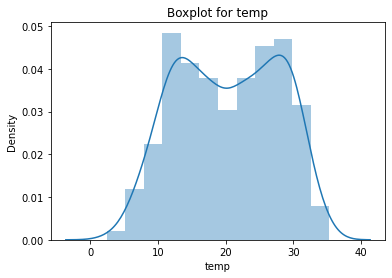

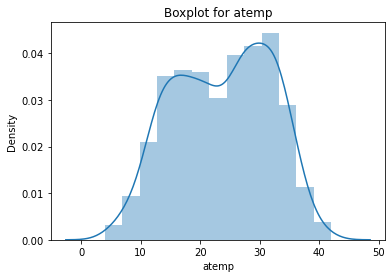

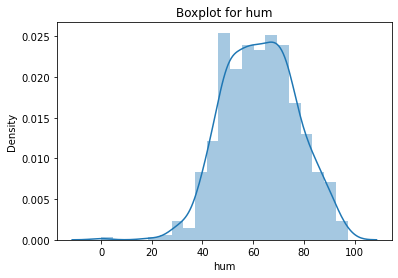

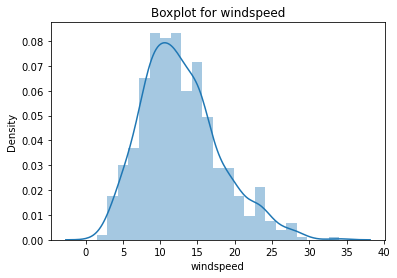

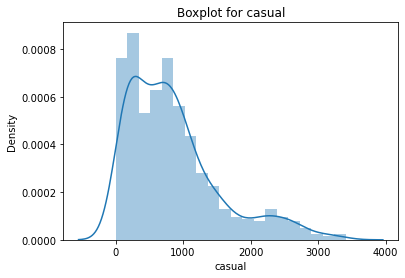

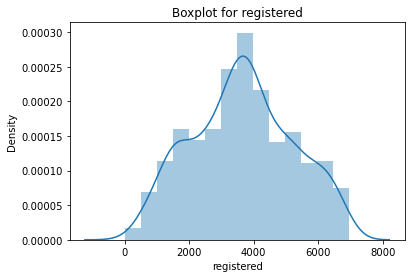

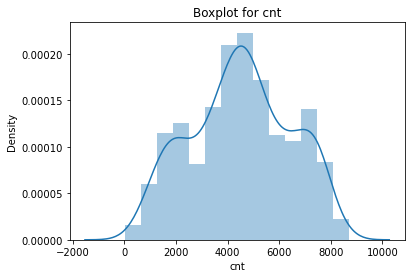

In [25]:
for i in cont_cols:
    sns.distplot(df[i])
    plt.title("Boxplot for "+i)
   
    plt.show()

### Insights

1. temp and atemp have almost similar distribution. So there is multicollinearity
2. Data is normally distributed

#### Data visualization for categorical variables

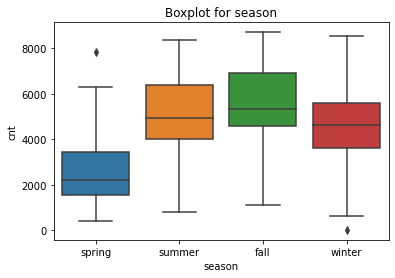

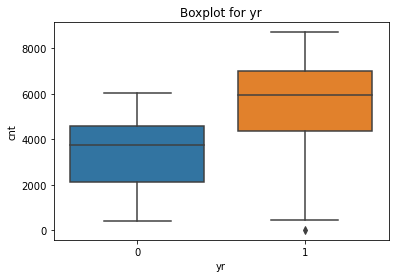

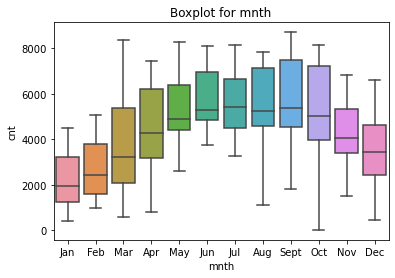

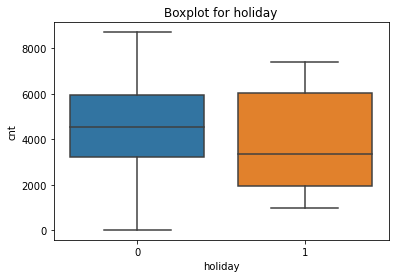

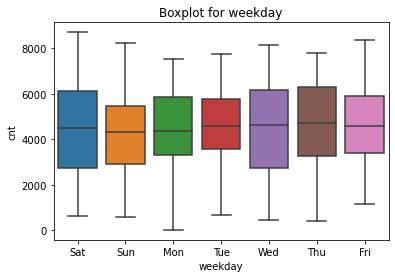

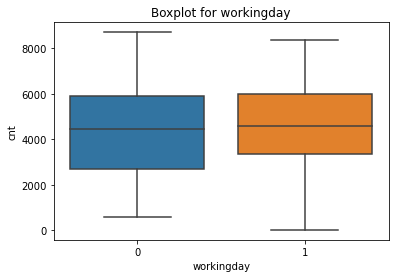

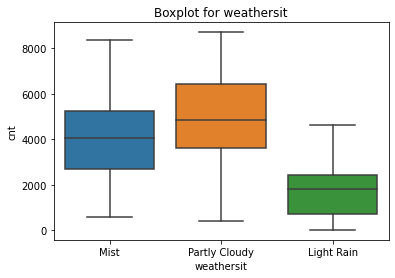

In [26]:
for i in cat_cols:
    sns.boxplot(x = df[i], y = 'cnt', data = df)
    plt.title("Boxplot for "+i)
    plt.show()


### Insights

1. There is more demand in summer and fall.
2. Demand has significantly increased in the year 2019
3. There is no variation seen in weekday or weekend
4. Demand decreases as weather worsens(i.e. during rainfall, thunderstorm)

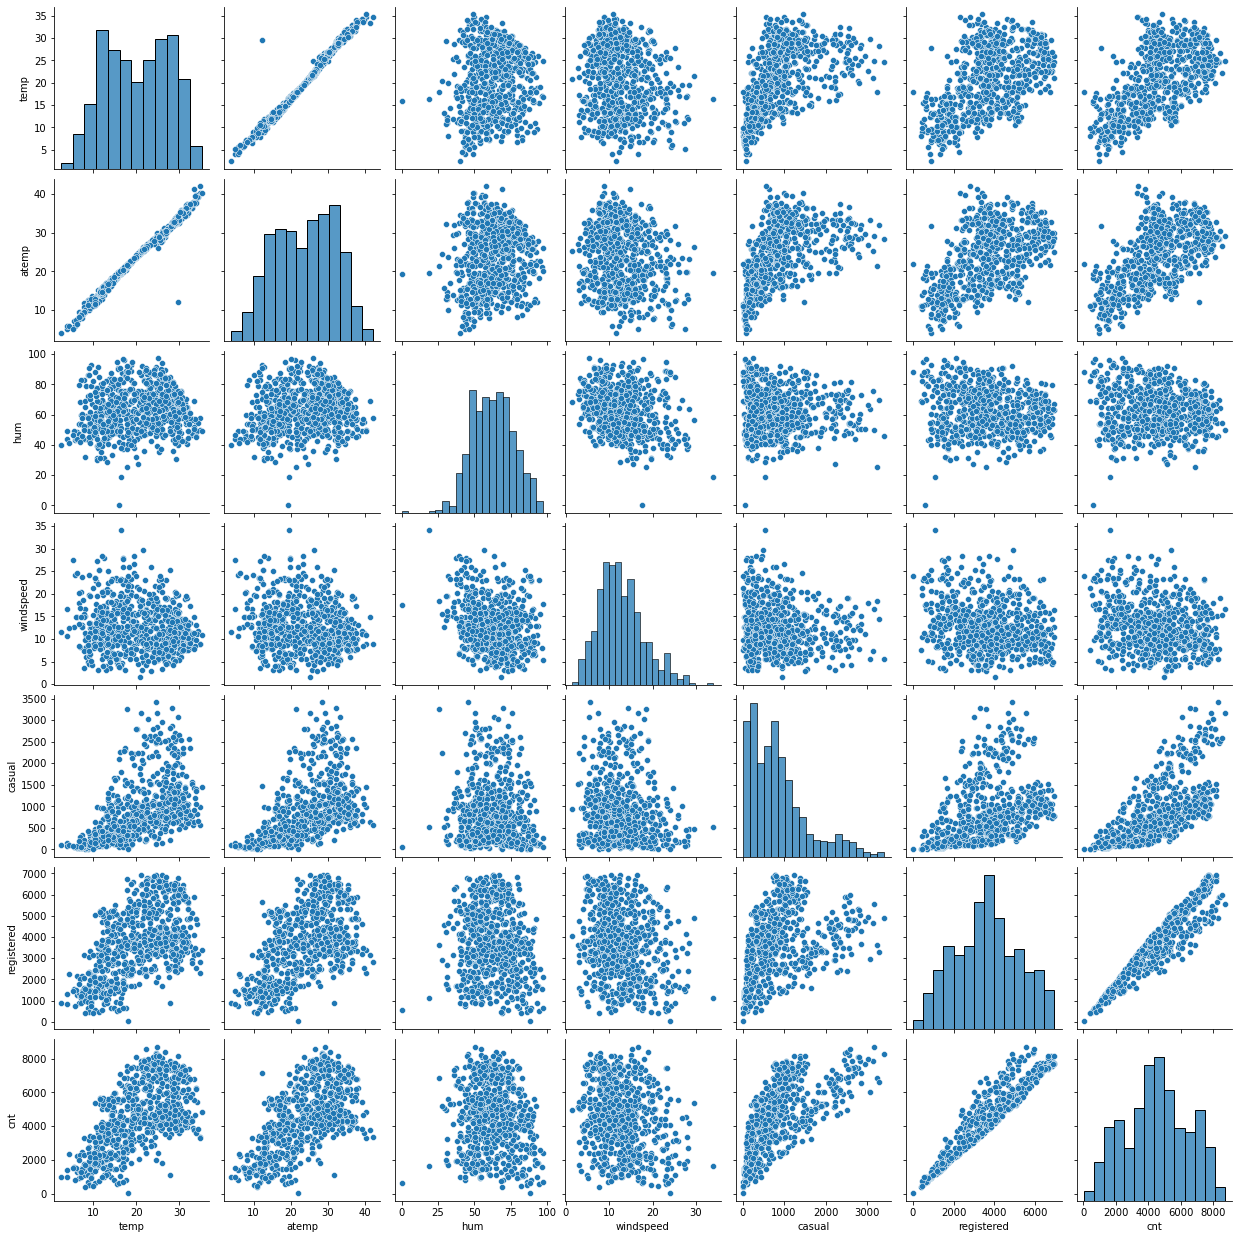

In [27]:
# Pair plot to check correlation between numeric variables 
sns.pairplot(df[cont_cols])
plt.show()

<AxesSubplot:>

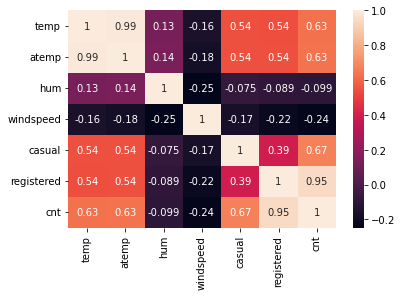

In [28]:
# heatmap to check correlation between numeric variables 
cor=df[cont_cols].corr()
sns.heatmap(cor, annot=True)

### Insights

1. There is more correlation between temp & atemp. So same information is provided by both columns to the model. Hence drop atemp column

In [29]:
#Drop atemp column as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True)    

In [30]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,Partly Cloudy,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,Partly Cloudy,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,Partly Cloudy,9.305237,43.6957,12.522300,82,1518,1600


In [31]:
# Now there are 15 columns remaining
df.shape

(730, 15)

## Data Preparation

In [32]:
# Create list for categorical variables for which we have to create dummy variables
categorical_vars=['season','mnth','weekday','weathersit']

In [33]:
# Get dummy columns 
df_dummies = pd.get_dummies(df[categorical_vars], drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [34]:
# Drop the original categorical variable columns as we have created dummy columns
df = df.drop(list(categorical_vars), axis=1)

In [35]:
df.shape

(730, 11)

In [36]:
# Concat dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [37]:
# Verify total columns i.e. 11(original) + 22(dummy) columns
df.shape

(730, 33)

In [38]:
# Drop the 'index' and 'dteday' column as they are not useful for the analysis
df =df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,1


## Model Building

In [39]:
# Split the dataframe into train and test sets 
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=10)

In [40]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
72,0,0,1,13.333897,49.6957,9.174042,359,1687,2046,1,...,0,0,1,0,0,0,0,0,0,1
510,1,0,0,28.392500,73.2500,13.332464,2855,3681,6536,0,...,0,0,0,1,0,0,0,0,0,1
700,1,0,0,14.247500,82.3333,8.333393,892,3757,4649,0,...,0,0,0,0,1,0,0,0,1,0
264,0,0,1,25.761653,90.2083,8.584375,555,4240,4795,0,...,0,1,0,0,0,1,0,0,1,0
577,1,0,1,29.417500,67.7500,9.458993,1074,6506,7580,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
# 70% of dataset is considered as train dataset 
df_train.shape

(510, 31)

### Scaling

In [42]:
# Perform scaling on numeric variables to fit all values in same range on training dataset. Here MinMaxScaler is used to perform scaling
scaler = MinMaxScaler()

In [43]:
# Get column names to filter only numeric values
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Mist',
       'weathersit_Partly Cloudy'],
      dtype='object')

In [44]:
# Scale all the numeric values columns 
num_var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [45]:
# Verify the values are scaled. max is 1 for all columns so scaling is performed properly
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.690196,0.513354,0.563841,0.342904,0.243119,0.498375,0.492000,0.247059,...,0.084314,0.092157,0.147059,0.147059,0.129412,0.137255,0.149020,0.152941,0.345098,0.621569
std,0.500429,0.179682,0.462867,0.233194,0.183851,0.162760,0.201326,0.241919,0.236196,0.431725,...,0.278131,0.289531,0.354512,0.354512,0.335985,0.344454,0.356457,0.360284,0.475867,0.485472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.426048,0.225964,0.089753,0.318377,0.325456,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506613,0.562400,0.322431,0.200529,0.499311,0.490945,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.721686,0.697621,0.434281,0.319244,0.676340,0.675812,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


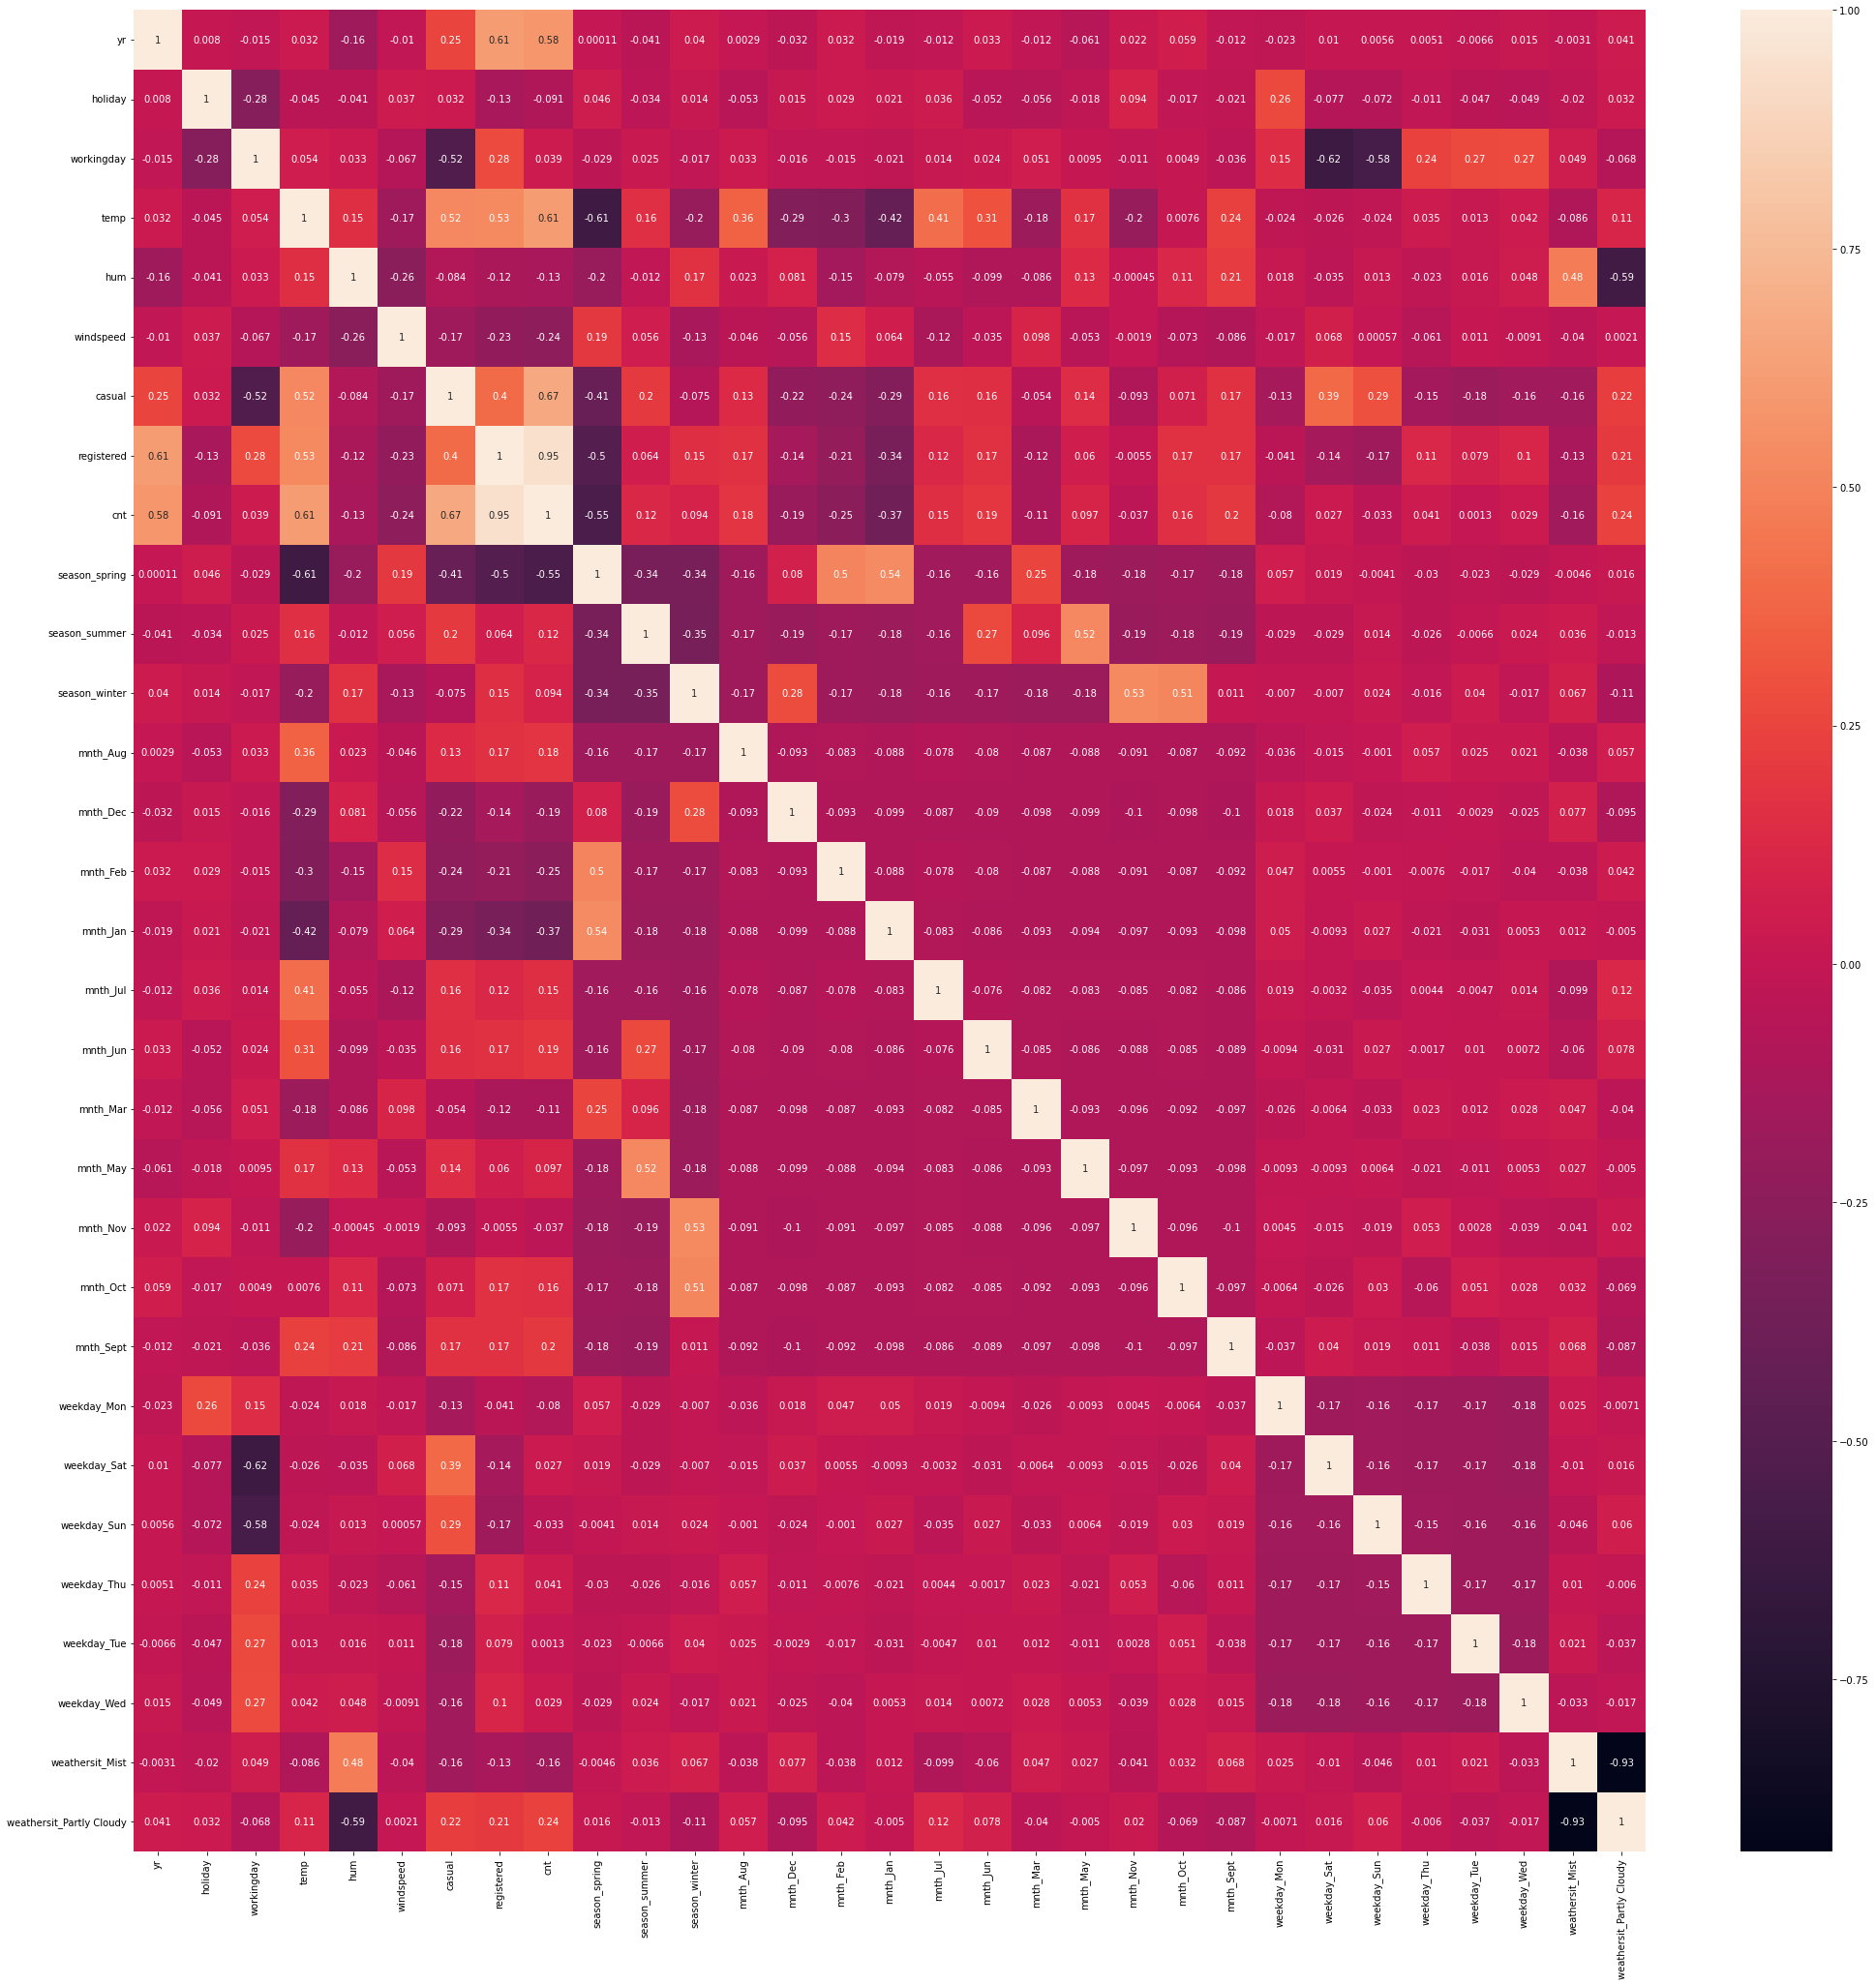

In [46]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (35, 35))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Insights
1. casual and registered are correlated to cnt variable as together they add up to cnt. Hence need to drop the 2 columns

In [47]:
#Check number of columns first 
df_train.shape

(510, 31)

In [48]:
#Dropping 'casual' and 'registered' as together they add up to cnt
df_train = df_train.drop(["casual","registered"],axis=1)
df_train.shape

(510, 29)

#### Dividing train dataset into X & Y sets

In [49]:
# cnt is target variable so store in y_train 
y_train = df_train.pop('cnt')
X_train = df_train

In [50]:
# There are total 28 features in X_train now
X_train.shape

(510, 28)

#### Building model with all features using stats 

In [51]:
## Add constant explicitly
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.19e-181
Time:                        18:52:05   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     482   BIC:                            -825.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9.946e+10   9.97e+11      0.100      0.921   -1.86e+12    2.06e+12
yr                           0.2485      0.009     28.940      0.000       0.232       0.265
holiday                  -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
workingday               -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
temp                         0.4344      0.046      9.526      0.000       0.345       0.524
hum                         -0.1602      0.035     -4.586      0.000      -0.229      -0.092
windspeed                   -0.1822      0.029     -6.370      0.000      -0.238      -0.126
season_spring               -0.1108      0.031     -3.618      0.000      -0.171      -0.051
season_summer               -0.0039      0.028     -0.140      0.889      -0.059       0.051
season_winter                0.0832      0.027      3.116      0.002       0.031       0.136
mnth_Aug                    -0.0246      0.036     -0.683      0.495      -0.096       0.046
mnth_Dec                    -0.0633      0.035     -1.834      0.067      -0.131       0.005
mnth_Feb                    -0.0374      0.034     -1.087      0.277      -0.105       0.030
mnth_Jan                    -0.0582      0.035     -1.646      0.100      -0.128       0.011
mnth_Jul                    -0.0798      0.037     -2.135      0.033      -0.153      -0.006
mnth_Jun                    -0.0172      0.025     -0.676      0.499      -0.067       0.033
mnth_Mar                     0.0162      0.026      0.625      0.533      -0.035       0.067
mnth_May                     0.0219      0.021      1.037      0.300      -0.020       0.063
mnth_Nov                    -0.0761      0.037     -2.037      0.042      -0.150      -0.003
mnth_Oct                     0.0068      0.037      0.186      0.852      -0.065       0.079
mnth_Sept                    0.0442      0.033      1.327      0.185      -0.021       0.110
weekday_Mon                 -0.0243      0.016     -1.528      0.127      -0.055       0.007
weekday_Sat              -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
weekday_Sun              -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
weekday_Thu                 -0.0039      0.016     -0.245      0.807      -0.035       0.027
weekday_Tue                 -0.0118      0.016     -0.755      0.451      -0.042       0.019
weekday_Wed                 -0.0038      0.016     -0.244      0.807      -0.034       0.027
weathersit_Mist              0.1513      0.026      5.839      0.000       0.100       0.202
weathersit_Partly Cloudy     0.2071      0.029      7.248      0.000       0.151       0.263
==============================================================================
Omnibus:                    

#### Building model with all features using sklearn 

In [52]:
# Create object of LinearRegression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.48431748e-01 -5.81927635e+11 -5.81927635e+11  4.35409546e-01
 -1.57836914e-01 -1.84307098e-01 -1.16837859e-01 -6.92749023e-03
  8.04138184e-02 -2.79369354e-02 -6.29730225e-02 -3.28979492e-02
 -5.17349243e-02 -8.47053528e-02 -1.71203613e-02  1.86347961e-02
  2.24914551e-02 -7.36923218e-02  5.70678711e-03  4.42352295e-02
 -2.36511230e-02 -5.81927635e+11 -5.81927635e+11 -5.08880615e-03
 -1.06430054e-02 -2.61688232e-03  1.53896332e-01  2.09869385e-01]
581927635252.9419


In [54]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.19e-181
Time:                        18:52:06   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     482   BIC:                            -825.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9.946e+10   9.97e+11      0.100      0.921   -1.86e+12    2.06e+12
yr                           0.2485      0.009     28.940      0.000       0.232       0.265
holiday                  -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
workingday               -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
temp                         0.4344      0.046      9.526      0.000       0.345       0.524
hum                         -0.1602      0.035     -4.586      0.000      -0.229      -0.092
windspeed                   -0.1822      0.029     -6.370      0.000      -0.238      -0.126
season_spring               -0.1108      0.031     -3.618      0.000      -0.171      -0.051
season_summer               -0.0039      0.028     -0.140      0.889      -0.059       0.051
season_winter                0.0832      0.027      3.116      0.002       0.031       0.136
mnth_Aug                    -0.0246      0.036     -0.683      0.495      -0.096       0.046
mnth_Dec                    -0.0633      0.035     -1.834      0.067      -0.131       0.005
mnth_Feb                    -0.0374      0.034     -1.087      0.277      -0.105       0.030
mnth_Jan                    -0.0582      0.035     -1.646      0.100      -0.128       0.011
mnth_Jul                    -0.0798      0.037     -2.135      0.033      -0.153      -0.006
mnth_Jun                    -0.0172      0.025     -0.676      0.499      -0.067       0.033
mnth_Mar                     0.0162      0.026      0.625      0.533      -0.035       0.067
mnth_May                     0.0219      0.021      1.037      0.300      -0.020       0.063
mnth_Nov                    -0.0761      0.037     -2.037      0.042      -0.150      -0.003
mnth_Oct                     0.0068      0.037      0.186      0.852      -0.065       0.079
mnth_Sept                    0.0442      0.033      1.327      0.185      -0.021       0.110
weekday_Mon                 -0.0243      0.016     -1.528      0.127      -0.055       0.007
weekday_Sat              -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
weekday_Sun              -9.946e+10   9.97e+11     -0.100      0.921   -2.06e+12    1.86e+12
weekday_Thu                 -0.0039      0.016     -0.245      0.807      -0.035       0.027
weekday_Tue                 -0.0118      0.016     -0.755      0.451      -0.042       0.019
weekday_Wed                 -0.0038      0.016     -0.244      0.807      -0.034       0.027
weathersit_Mist              0.1513      0.026      5.839      0.000       0.100       0.202
weathersit_Partly Cloudy     0.2071      0.029      7.248      0.000       0.151       0.263
==============================================================================
Omnibus:                    

### Important Points
1. The metrics obtained with 28 parameters on training dataset using sklearn & stats module is same 
2. The R-squared with 28 parameters is 0.852 and adjusted R-squared is 0.844

### Model building using RFE

#### Here we will use RFE to select top n features, first we'll consider n=15. Then using these 15 features we'll build model to check R-squared

In [55]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select =15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the support and ranking results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True False  True False  True False
 False  True False False False  True False False False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1 12  1  5  1  3  2  1  6  9  8  1 10  4  7  1  1 13
 11 14  1  1]


In [56]:
# Check the columns and corresponding rank & support
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Mist', 'weathersit_Partly Cloudy'],
      dtype='object')

In [57]:
# Build model using stats 
# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Nov,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Partly Cloudy
72,1.0,0,0,1,0.298094,0.393891,0.236118,1,0,0,0,0,0,0,0,1
510,1.0,1,0,0,0.778657,0.694105,0.364071,0,0,0,0,0,1,0,0,1
700,1.0,1,0,0,0.327249,0.809877,0.210252,0,1,1,0,0,0,1,1,0
264,1.0,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,0,0,0,1,0
577,1.0,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,0,0,0,0,1


In [58]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.28e-188
Time:                        18:52:06   Log-Likelihood:                 483.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     495   BIC:                            -873.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Insights
1. The R-squared value obtained is 0.842, which is comparatively similar to R-squared value that we got with 28 features

In [59]:
# Dropping const to calculate VIF of features
X_train_final=X_train_rfe1.drop('const',axis=1)

In [60]:
# Dataframe that contains the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,78.28
11,weekday_Sat,17.81
12,weekday_Sun,16.12
14,weathersit_Partly Cloudy,10.78
13,weathersit_Mist,8.49
1,holiday,4.95
3,temp,3.13
6,season_spring,2.58
4,hum,2.21
7,season_winter,2.21


### RFE with 13 variables

In [61]:
# RFE with 13 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select =13)

# Fit with 13 features
rfe2.fit(X_train, y_train)

# Print the support and ranking results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True  True  True False  True False False False
 False  True False False False False False False False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1 14  1  7  3  5  4  1  8 11 10  2 12  6  9  1  1 15
 13 16  1  1]


In [62]:
# Subset the features selected by rfe2
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 13 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Partly Cloudy
72,1.0,0,0,1,0.298094,0.393891,0.236118,1,0,0,0,0,0,1
510,1.0,1,0,0,0.778657,0.694105,0.364071,0,0,0,1,0,0,1
700,1.0,1,0,0,0.327249,0.809877,0.210252,0,1,0,0,1,1,0
264,1.0,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,0,1,0
577,1.0,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,0,0,1


In [63]:
# Fitting the model with 13 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.68e-186
Time:                        18:52:06   Log-Likelihood:                 472.88
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     497   BIC:                            -864.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
# Dropping const to calculate VIF of features
X_train_final=X_train_rfe2.drop('const',axis=1)
X_train_rfe2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Mist', 'weathersit_Partly Cloudy'],
      dtype='object')

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,77.52
9,weekday_Sat,17.64
10,weekday_Sun,16.03
12,weathersit_Partly Cloudy,10.76
11,weathersit_Mist,8.49
1,holiday,4.87
3,temp,2.84
6,season_spring,2.53
4,hum,2.20
7,season_winter,1.71


#### We will consider these 13 features as the R-squared obtained is 0.835 which is comparatively similar to R-squared & Adj R-squared obtained for 15 variables. P-value and VIF is more for 'weekday_Sun' feature, so we can drop the feature

In [66]:
X_train_new = X_train_rfe2.drop('weekday_Sun',axis=1)

In [67]:
#verify if 'weekday_Sun' column is dropped
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Partly Cloudy'],
      dtype='object')

In [68]:
# Subset the features
col1 = X_train_new.columns

# Subsetting training data for 12 selected columns
X_train_rfe2 = X_train_new[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,weekday_Sat,weathersit_Mist,weathersit_Partly Cloudy
72,1.0,0,0,1,0.298094,0.393891,0.236118,1,0,0,0,0,1
510,1.0,1,0,0,0.778657,0.694105,0.364071,0,0,0,1,0,1
700,1.0,1,0,0,0.327249,0.809877,0.210252,0,1,0,0,1,0
264,1.0,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,1,0
577,1.0,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,0,1


In [69]:
# Fitting the model with 12 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.82e-186
Time:                        18:52:06   Log-Likelihood:                 473.02
No. Observations:                 510   AIC:                            -920.0
Df Residuals:                     497   BIC:                            -865.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### After removing 'weekday_Sun' column the R-square & Adj R-squared is almost similar 

In [70]:
# Dropping const to calculate VIF of features
X_train_final=X_train_rfe2.drop('const',axis=1)

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,15.97
4,hum,12.66
11,weathersit_Partly Cloudy,11.17
10,weathersit_Mist,6.93
2,workingday,5.83
5,windspeed,5.01
6,season_spring,3.11
7,season_winter,2.17
0,yr,2.12
9,weekday_Sat,2.05


#### The VIF for column 'hum' is greater than 5, so we can drop this feature as it is related with many other features

In [72]:
X_train_new = X_train_rfe2.drop('hum',axis=1)

In [73]:
#verify if 'hum' column is dropped
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Partly Cloudy'],
      dtype='object')

In [74]:
# Subset the features
col1 = X_train_new.columns

# Subsetting training data for 11 selected columns
X_train_rfe2 = X_train_new[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,windspeed,season_spring,season_winter,mnth_Jul,weekday_Sat,weathersit_Mist,weathersit_Partly Cloudy
72,1.0,0,0,1,0.298094,0.236118,1,0,0,0,0,1
510,1.0,1,0,0,0.778657,0.364071,0,0,0,1,0,1
700,1.0,1,0,0,0.327249,0.210252,0,1,0,0,1,0
264,1.0,0,0,1,0.694699,0.217975,0,0,0,0,1,0
577,1.0,1,0,1,0.811368,0.244886,0,0,0,0,0,1


In [75]:
# Fitting the model with 11 variables
lm4 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.80e-183
Time:                        18:52:06   Log-Likelihood:                 463.11
No. Observations:                 510   AIC:                            -902.2
Df Residuals:                     498   BIC:                            -851.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [76]:
# Dropping const to calculate VIF of features
X_train_final=X_train_rfe2.drop('const',axis=1)

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_Partly Cloudy,11.17
3,temp,11.03
9,weathersit_Mist,6.40
2,workingday,5.67
4,windspeed,5.01
5,season_spring,2.72
0,yr,2.07
8,weekday_Sat,2.02
6,season_winter,1.77
7,mnth_Jul,1.32


#### With 11 features the R-squared & Adj R-squared value is 0.829 & 0.825 respectively. We will again use RFE to select top 7 features from 11 features

In [78]:
# RFE with 7 features
lm = LinearRegression()
rfe3 = RFE(lm, n_features_to_select =7)

# Fit with 7 features
rfe3.fit(X_train_rfe2, y_train)

# Print the boolean results
print(rfe3.support_)           
print(rfe3.ranking_)  

[False  True  True False  True  True  True False False False  True  True]
[6 1 1 5 1 1 1 3 2 4 1 1]


In [79]:
X_train_rfe2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Partly Cloudy'],
      dtype='object')

In [80]:
# Subset the features selected by rfe3
col1 = X_train_rfe2.columns[rfe3.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train_rfe2[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,windspeed,season_spring,weathersit_Mist,weathersit_Partly Cloudy
72,1.0,0,0,0.298094,0.236118,1,0,1
510,1.0,1,0,0.778657,0.364071,0,0,1
700,1.0,1,0,0.327249,0.210252,0,1,0
264,1.0,0,0,0.694699,0.217975,0,1,0
577,1.0,1,0,0.811368,0.244886,0,0,1


In [81]:
# Fitting the model with 7 variables
lm5 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.98e-179
Time:                        18:52:06   Log-Likelihood:                 442.23
No. Observations:                 510   AIC:                            -868.5
Df Residuals:                     502   BIC:                            -834.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
X_train_final=X_train_rfe2.drop('const',axis=1)

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_Partly Cloudy,8.57
2,temp,7.90
3,windspeed,4.76
5,weathersit_Mist,4.67
0,yr,2.05
4,season_spring,2.05
1,holiday,1.04


<AxesSubplot:>

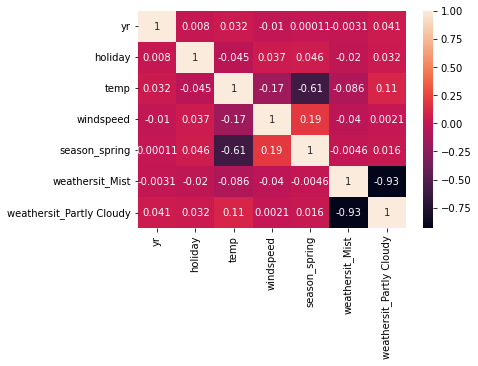

In [84]:
corr1 = X_train_final.corr()
sns.heatmap(corr1,annot=True)

#### Drop 'weathersit_Mist' column as it has high VIF value. If we remove weathersit_Partly Cloud, temp or windspeed individually & check the R-squared value there is significant difference seen. After removing 'weathersit_Mist' the R-squared & Adj R-squared doesnot drop significantly.

In [85]:
X_train_new = X_train_rfe2.drop('weathersit_Mist',axis=1)

In [86]:
# Subset the features
col1 = X_train_new.columns

# Subsetting training data for 6 selected columns
X_train_rfe2 = X_train_new[col1]

In [87]:
# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()
# Fitting the model with 6 variables
lm6 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     330.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.87e-171
Time:                        18:52:07   Log-Likelihood:                 420.31
No. Observations:                 510   AIC:                            -826.6
Df Residuals:                     503   BIC:                            -797.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [88]:
X_train_final=X_train_rfe2.drop('const',axis=1)

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.25
3,windspeed,4.10
5,weathersit_Partly Cloudy,2.63
0,yr,1.95
4,season_spring,1.67
1,holiday,1.04


#### The VIF values and p-values are in the acceptable range. The Adjusted R-squared value has dropped from 84.4% with 28 variables to just 79.5% with 6 variables. This model can be used for prediction as it is explaining most of the variance.

### Residual Analysis

In [90]:
# Predict y values of train dataset
y_train_cnt = lm6.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

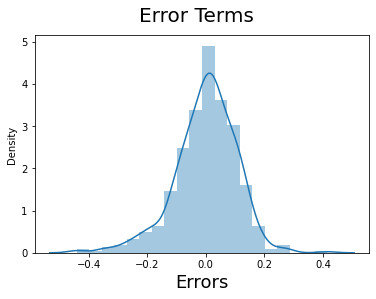

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

#### Insights
1. The error terms are normally distributed centered at 0. So the assumption holds true and we can use this model

#### Prediction on test dataset

In [92]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,weathersit_Partly Cloudy
72,1.0,0,0,0.298094,0.236118,1,1
510,1.0,1,0,0.778657,0.364071,0,1
700,1.0,1,0,0.327249,0.210252,0,0
264,1.0,0,0,0.694699,0.217975,0,0
577,1.0,1,0,0.811368,0.244886,0,1
...,...,...,...,...,...,...,...
369,1.0,1,0,0.220394,0.221813,1,1
320,1.0,0,0,0.319617,0.583358,0,0
527,1.0,1,0,0.727410,0.396136,0,0
125,1.0,0,0,0.499526,0.424379,0,1


In [93]:
# List of numerical variables that we had defined
num_var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [94]:
# We need to scale test dataset as well, here we will use transform to scale values
df_test[num_var] = scaler.transform(df_test[num_var])

In [95]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.018182,0.668182,0.538780,0.552654,0.355062,0.256193,0.492465,0.492709,0.245455,...,0.086364,0.059091,0.136364,0.136364,0.177273,0.154545,0.127273,0.113636,0.318182,0.663636
std,0.500809,0.133913,0.471940,0.253365,0.175978,0.152994,0.203213,0.232104,0.228453,0.431338,...,0.281541,0.236333,0.343957,0.343957,0.382770,0.362295,0.334038,0.318093,0.466833,0.473542
min,0.000000,0.000000,0.000000,-0.050062,-0.239512,0.041051,-0.002058,-0.060643,-0.049378,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311711,0.420738,0.249687,0.098794,0.329211,0.338253,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.559495,0.556027,0.335269,0.221847,0.489969,0.509960,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.775931,0.679103,0.437533,0.329903,0.660758,0.653054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.983645,0.969106,0.864144,0.962658,0.995559,0.933961,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# Split the 'df_test' set into X and y after scaling, also remove 'casual' & 'registered' as it was done in train dataset
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [97]:
final_cols = X_train_final.columns

In [98]:
# Subset the columns into new dataframe 'X_test_rfe1'
X_test_rfe1 = X_test[final_cols]

In [99]:
# Add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 566 to 323
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     220 non-null    float64
 1   yr                        220 non-null    int64  
 2   holiday                   220 non-null    int64  
 3   temp                      220 non-null    float64
 4   windspeed                 220 non-null    float64
 5   season_spring             220 non-null    uint8  
 6   weathersit_Partly Cloudy  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 10.7 KB


In [100]:
# Making predictions
y_pred = lm6.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

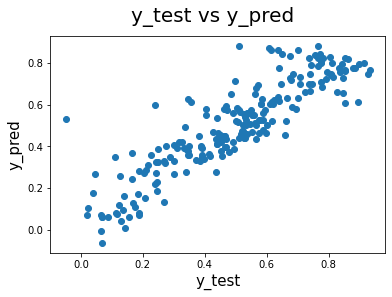

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 15)  

In [102]:
# calculate r2_score on test dataset for 6 variables
rsquare = r2_score(y_test, y_pred)

In [103]:
print("R-squared value on test dataset is",rsquare)

R-squared value on test dataset is 0.7747373914081197


In [104]:
#calculate adjusted r-squared using formulae. Here number of predictor variables = 6
adj_rsquare = 1- ((1-rsquare)*(len(y_test) - 1) / (len(y_test) - 6 - 1))

In [105]:
print("Adjusted R-squared value on test dataset is",adj_rsquare)

Adjusted R-squared value on test dataset is 0.7683919658139822


### The accuracy on train dataset is 79.8% and on test dataset it is 77.47%. The predictor variables or important features are - 
1. yr                        
2. holiday                   
3. temp                      
4. windspeed                 
5. season_spring            
6. weathersit_Partly Cloudy